# A Brief Tour of Transformers

In [1]:
pip install transformers torchvision networkx matplotlib ipywidgets plotly bertviz -q


Note: you may need to restart the kernel to use updated packages.


## Visualizing Attention
Attention mechanisms play a critical role in modern neural network architectures, enabling models to focus on specific parts of the input data when making predictions. Visualizing attention can provide valuable insights into the inner workings of these models and help identify strengths and weaknesses in their learning patterns.

### Birdirectional Models
Bidirectional models, such as BERT, use attention mechanisms to process input data in both forward and backward directions. This allows them to capture contextual information from the entire input sequence, which is particularly useful for tasks such as text classification, sentiment analysis, and named entity recognition. Visualizing attention in bidirectional models can reveal how the model learns to weigh different parts of the input data and identify relationships between words or tokens that contribute to its final prediction. Attention heatmaps and graphs are common techniques used to represent the attention scores between tokens in bidirectional models.

### Autoregressive Models
Autoregressive models, like the GPT models, generate sequences of data by predicting one token at a time, conditioning the next token's prediction on the previously generated tokens. These models heavily rely on attention mechanisms to capture long-range dependencies and contextual information from the past tokens. Visualizing attention in autoregressive models can help uncover how the model learns to generate coherent and contextually relevant text based on the given input. We can also use heatmaps and graphs to visualize autoregressive models. 

In [2]:
from bertviz import head_view
from transformers import GPT2Tokenizer, GPT2Model

model_version = 'gpt2'
model = GPT2Model.from_pretrained(model_version, output_attentions=True)
tokenizer = GPT2Tokenizer.from_pretrained(model_version)

sentence_a = "The cat sat on the mat"
sentence_b = "The cat lay on the rug"

# Concatenate sentences with a space
text = f"{sentence_a} {sentence_b}"

inputs = tokenizer.encode_plus(text, return_tensors='pt')
input_ids = inputs['input_ids']

# GPT-2 does not use token_type_ids, so you can remove the corresponding lines
attention = model(input_ids)[-1]

# Calculate the index of the first token in sentence_b
sentence_b_start = len(tokenizer.encode(sentence_a))

input_id_list = input_ids[0].tolist()  # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list)

head_view(attention, tokens, sentence_b_start)

<IPython.core.display.Javascript object>

## Attention Matrices

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from transformers import GPT2Tokenizer, GPT2Model, BertTokenizer, BertModel
import ipywidgets as widgets
from IPython.display import display

# Function to initialize the tokenizer and the model
def initialize_model(model_name):
    if model_name == "gpt2":
        tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
        model = GPT2Model.from_pretrained("gpt2")
    elif model_name == "bert":
        tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
        model = BertModel.from_pretrained("bert-base-multilingual-cased")
    else:
        raise ValueError("Invalid model name")
    return tokenizer, model

# Initialize the tokenizer and the model
model_name = "gpt2"
tokenizer, model = initialize_model(model_name)

def visualize_attention(sentence1, sentence2, layer, head, model_name):
    tokenizer, model = initialize_model(model_name)
    
    sentences = [sentence1, sentence2]
    
    # Tokenize and create tensor inputs
    input_ids = [tokenizer.encode(sentence, return_tensors="pt") for sentence in sentences]

    # Process the input sentences with the selected model
    with torch.no_grad():
        outputs = [model(ids, output_attentions=True) for ids in input_ids]

    # Get the attention weights from the specified layer and head
    attention_weights = [output.attentions[layer].squeeze(0)[head] for output in outputs]

    # Plot the attention weights for both sentences
    for i, sentence in enumerate(sentences):
        tokens = tokenizer.tokenize(sentence)
        plt.figure(figsize=(6, 6))
        plt.imshow(attention_weights[i], cmap="viridis")
        plt.xticks(range(len(tokens)), tokens, rotation=90)
        plt.yticks(range(len(tokens)), tokens)
        plt.xlabel("Keys")
        plt.ylabel("Queries")
        plt.title(f"Sentence {i + 1}: Attention weights in layer {layer + 1}, head {head + 1}")
        plt.show()

# Create input widgets
sentence1_input = widgets.Text(value="Quantum information theory is interesting", description="Sentence 1:")
sentence2_input = widgets.Text(value="קוואַנטום אינפֿאָרמאַציע טעאָריע איז אינטערעסאַנט", description="Sentence 2:")
layer_slider = widgets.IntSlider(min=0, max=model.config.num_hidden_layers - 1, description="Layer:")
head_slider = widgets.IntSlider(min=0, max=model.config.num_attention_heads - 1, description="Head:")
model_dropdown = widgets.Dropdown(options=["gpt2", "bert"], value="gpt2", description="Model:")

# Create interactive output
interactive_output = widgets.interactive_output(
    visualize_attention,
    {
        "sentence1": sentence1_input,
        "sentence2": sentence2_input,
        "layer": layer_slider,
        "head": head_slider,
        "model_name": model_dropdown,
    },
)

# Display input widgets and interactive output
display(sentence1_input, sentence2_input, layer_slider, head_slider, model_dropdown, interactive_output)

Text(value='Quantum information theory is interesting', description='Sentence 1:')

Text(value='קוואַנטום אינפֿאָרמאַציע טעאָריע איז אינטערעסאַנט', description='Sentence 2:')

IntSlider(value=0, description='Layer:', max=11)

IntSlider(value=0, description='Head:', max=11)

Dropdown(description='Model:', options=('gpt2', 'bert'), value='gpt2')

Output()

In [4]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from transformers import ViTFeatureExtractor, ViTModel, DeiTFeatureExtractor, DeiTModel
import ipywidgets as widgets
from IPython.display import display

# Function to initialize the feature extractor and the model
def initialize_model(model_name):
    if model_name == "vit":
        feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
        model = ViTModel.from_pretrained("google/vit-base-patch16-224")
    elif model_name == "deit":
        feature_extractor = DeiTFeatureExtractor.from_pretrained("facebook/deit-base-distilled-patch16-224")
        model = DeiTModel.from_pretrained("facebook/deit-base-distilled-patch16-224")
    else:
        raise ValueError("Invalid model name")
    return feature_extractor, model

# Initialize the feature extractor and the model
model_name = "vit"
feature_extractor, model = initialize_model(model_name)

def visualize_attention(image_path1, image_path2, layer, head, model_name):
    feature_extractor, model = initialize_model(model_name)
    
    image_paths = [image_path1, image_path2]
    
    # Load images and create tensor inputs
    images = [Image.open(image_path).convert("RGB") for image_path in image_paths]
    inputs = [feature_extractor(images=[image], return_tensors="pt") for image in images]

    # Process the input images with the selected model
    with torch.no_grad():
        outputs = [model(**input, output_attentions=True) for input in inputs]

    # Get the attention weights from the specified layer and head
    attention_weights = [output.attentions[layer].squeeze(0)[head] for output in outputs]

    # Plot the attention weights for both images
    for i, image_path in enumerate(image_paths):
        plt.figure(figsize=(6, 6))
        plt.imshow(attention_weights[i], cmap="viridis")
        plt.xlabel("Keys")
        plt.ylabel("Queries")
        plt.title(f"Image {i + 1}: Attention weights in layer {layer + 1}, head {head + 1}")
        plt.show()

# Create input widgets
image_path1_input = widgets.Text(value="heart.png", description="Image 1:")
image_path2_input = widgets.Text(value="simplicial_complex_1.png", description="Image 2:")
layer_slider = widgets.IntSlider(min=0, max=model.config.num_hidden_layers - 1, description="Layer:")
head_slider = widgets.IntSlider(min=0, max=model.config.num_attention_heads - 1, description="Head:")
model_dropdown = widgets.Dropdown(options=["vit", "deit"], value="vit", description="Model:")

# Create interactive output
interactive_output = widgets.interactive_output(
    visualize_attention,
    {
        "image_path1": image_path1_input,
        "image_path2": image_path2_input,
        "layer": layer_slider,
        "head": head_slider,
        "model_name": model_dropdown,
    },
)

# Display input widgets and interactive output
display(image_path1_input, image_path2_input, layer_slider, head_slider, model_dropdown, interactive_output)


/Users/amelieschreiber/anaconda3/envs/env_1/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Text(value='heart.png', description='Image 1:')

Text(value='simplicial_complex_1.png', description='Image 2:')

IntSlider(value=0, description='Layer:', max=11)

IntSlider(value=0, description='Head:', max=11)

Dropdown(description='Model:', options=('vit', 'deit'), value='vit')

Output()

ViT (Vision Transformer) and DeiT (Data-efficient Image Transformer) are both transformer-based models designed specifically for computer vision tasks, such as image classification. They are neither bidirectional nor autoregressive models.

In contrast to bidirectional models like BERT, which process input sequences in both directions (left-to-right and right-to-left), or autoregressive models like GPT, which process input sequences in a left-to-right manner, ViT and DeiT are designed to process images. They treat an image as a sequence of flattened fixed-size patches and then apply the transformer architecture to these sequences.

The core architecture of ViT and DeiT is based on the transformer architecture initially designed for natural language processing tasks. However, they do not explicitly model any form of sequential or bidirectional dependencies like in NLP models. Instead, they capture spatial dependencies in the image by processing the sequence of image patches.

ViT (Vision Transformer) and DeiT (Data-efficient Image Transformer) do make use of positional encoding to provide information about the relative positions of the patches in the image. Since these models are based on the original transformer architecture, they rely on the positional encoding to inject spatial information into the input sequence, as the self-attention mechanism in the transformer architecture is permutation-equivariant and doesn't have any inherent notion of position.

ViT and DeiT use learnable positional embeddings, which are added to the patch embeddings before being fed into the transformer layers. The learnable positional embeddings are represented as a matrix with dimensions (num_patches + 1, hidden_dim), where num_patches is the number of patches in the image, and hidden_dim is the dimension of the patch embeddings. The "+1" in the dimensions is for the additional class token, which is used to predict the class label for classification tasks.

These learnable positional embeddings are initialized randomly and are updated via backpropagation during the training process, allowing the model to learn the most suitable positional information for the task at hand.

Attention graphs are visual representations of the attention mechanism within transformer models, which play a crucial role in understanding and interpreting the relationships between input tokens during natural language processing tasks. The attention mechanism enables transformers to selectively focus on relevant portions of the input sequence and weigh their importance, thereby allowing for efficient and context-aware processing. Attention graphs illustrate these weighted connections between tokens through a matrix or a graph, with the thickness or intensity of the lines indicating the strength of the attention between the corresponding tokens. By visualizing attention in transformers, attention graphs provide valuable insights into the model's decision-making process, assisting researchers in debugging, understanding, and optimizing the model's performance. Furthermore, these visualizations can help identify patterns in the model's behavior, reveal potential biases, and facilitate the development of more effective and robust transformer architectures.



### Effect of Permutations of Input Tokens on Attention Matrices

Suppose we have an input which has tokens $\{x_1, ..., x_{N}\}$ with embedding vectors $\{X_1, ..., X_N\} \subset \mathbb{R}^d$ giving the embedding matrix $X \in \mathbb{R}^{N \times d}$ where the $i^{th}$-row corresponds to a $d$-dimensional token embedding vector $X_i$. If we apply a permutation $\pi$ to the tokens $\{x_1, ..., x_{N}\} \mapsto \{x_{\pi^{-1}(1)}, ..., x_{\pi^{-1}(N)}\}$, then there is an induced permutation on the rows of $X$ given by the matrix representation $P$ of the permutation $\pi \in S_N$. This gives us a new matrix $X' = PX$. Now, we would like to define the attention matrix 

$$ A = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) $$

where $Q = XW_Q, K = XW_K$ and $d_k$ is the dimension of the *query vectors*, that is, the dimension of the rows of $K$. Now, applying the permutation to the input tokens can be represented as multiplication of $X$ by a permutation matrix $P$ giving $X' = PX$. Next, 

\begin{align*}
Q' &= X'W_Q = (PX)W_Q \\
K' &= X'W_K = (PX)W_K
\end{align*}

Now, let's compute the attention matrix $A'$ for the permuted input:

$$
A' = \text{softmax}\left(\frac{Q'K'^T}{\sqrt{d_k}}\right)
$$

Substitute $Q'$ and $K'$ with their expressions

$$
A' = \text{softmax}\left(\frac{(PXW_Q)((PXW_K)^T)}{\sqrt{d_k}}\right)
$$

$$
A' = \text{softmax}\left(\frac{P(XW_Q)(W_K^T X^T)P^T}{\sqrt{d_k}}\right)
$$

$$
A' = P \left(\text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)\right) P^T
$$

$$
A' = PAP^T
$$

This shows that a permutation of the input of a permutation-equivariant transformer induces a conjugation of the attention matrix by the same permutation. We will discuss permutation equivariance later on. 

## Translation Equivariance and Relative Positional Encodings

### Relative Positional Encodings
(See $\S 3.1$ of [Group Equivariant Stand-Alone Self-Attention For Vision](https://openreview.net/forum?id=JkfYjnOEo6M)): Introduced by Shaw et al., relative positional encodings consider the *relative distance* between the query token $i$ (the token we compute the representation of), and the key token $j$ (the token we attend to). The calculation of the attention scores then becomes:

$$ A_{i,j}^{rel}:= X_iW_{qry}((X_j + P_{x(j)-x(i)})W_{key})^T $$

where $P_{x(j)-x(i)} \in \mathbb{R}^{1 \times C_{in}}$ is a vector representation of the relative shift and $x(i)$ is the position of the token $i$ (which we define next). Consequently, similar patterns can be recognized as arbitrary positions, as relative query-key distances always remain equal. 

### A Functional Formulation of Self-Attention

Let $[n] = \{1, 2, ..., n\}$. Given a set $S$ and a vector space $V$, $L_V(S)$ will denote the space of (vector valued) functions $\{f:S \to V\}$. Square brackets are used when functions are arguments. Let $S = \{i\}_{i=1}^N$ be a set of $N$ elements. A matrix $X \in \mathbb{R}^{N \times C_{in}}$ can be interpreted as a vector valued function $f:S \to \mathbb{R}^{C_{in}}$, that maps elements $i \in S$ to $C_{in}$-dimensional vectors ($i \mapsto f(i)$). Consequently, a matrix multiplication $XW_y^T$ of matrices $X \in \mathbb{R}^{N \times C_{in}}$ and $W_y \in \mathbb{R}^{C_{out} \times C_{in}}$ can be represented as a function 

$$\phi_y: L_{\mathbb{R}^{C_{in}}}(S) \to L_{\mathbb{R}^{C_{out}}}(S)$$ 

where $f(i) \mapsto \phi_y(f(i))$. Following this notation, we can represent the position-less attention scores as:

$$ A_{i,j} = \alpha[f](i,j) = \langle \phi_{qry}(f(i)), \phi_{key}(f(j)) \rangle. $$

The function $\alpha[f]: S \times S \to \mathbb{R}$ maps pairs of elements $i, j \in S$ to the *attention score* of $j$ relative to $i$. Therefore, self attention can be written as

$$ Y_{i, :} = \zeta[f](i) = \sum_{j \in S} \sigma_j (\alpha[f](i,j))\phi_{val}(f(j)) = \sum_{j \in S} \sigma_j \left( \langle \phi_{qry}(f(i)), \phi_{key}(f(j)) \rangle \right)\phi_{val}(f(j)), $$

where $\sigma_j = \text{softmax}_j$ and $\zeta[f]:S \to \mathbb{R}^{C_h}$. Finally, multi-head self-attention can be written as 

\begin{align}
MHSA(X)_{i, :} &= m[f](i) \\
               &= \phi_{out}\left( \bigcup_{h \in [H]}\zeta^{(h)}[f](i) \right)\\
               &= \phi_{out}\left( \bigcup_{h \in [H]} \sum_{j \in S}\sigma_j\left( \langle \phi_{qry}(f(i)), \phi_{key}(f(j)) \rangle \right)\phi_{val}(f(j)) \right)
\end{align}

where $\bigcup$ is the functional equivalent of concatenation and $m[f]:S \to \mathbb{R}^{C_{out}}$. 

### Relative Positional Encodings are Translation Equivariant
Before proving this we should comment on its importance in vision tasks using vision transformers. Translation equivariance is a property that has proven important in CNN architectures. Now, what is translation equivariance? Suppose $S$ and $S'$ are sets and let $x:S \to \mathcal{X}$ and $x':S' \to \mathcal{X}'$ be injective maps from sets $S, S'$ to corresponding homogeneous $G$-spaces on which they are defined (the group $G$ acts on $\mathcal{X}$ and $\mathcal{X}'$). We say for vector spaces $V$ and $V'$ that a map $\phi:V to V'$ is $G$-equivariant if it commutes with the action of $G$, that is if

$$\phi[\mathcal{L}_g[f]] = \mathcal{L}'_g[\phi[f]], \quad \forall g \in G $$

where $\mathcal{L}_g[f](i):= f(x^{-1}(g^{-1}x(i))), \mathcal{L}_g'[f](i):= f(x'{-1}(g^{-1}x'(i)))$ are the induced (left-regular) representations of $G$ on $L_V(S)$ and $L_{V'}(S')$ respectively. An example of equivariance is *translation equivariance*. Often we have $X = \mathbb{R}^d$ with $G$ acting by translations. Then we denote the homogeneous spaces $(\mathcal{X}, +)$ and a map $\phi: L_V(S) \to L_{V'}(S)$ is equivariant to the action of $(\mathcal{X}, +)$ (or translation equivariant), if:

$$
\phi[\mathcal{L}_y[f]](i) = \mathcal{L}_y'[\phi[f]](i), \quad \forall f \in L_V(S), \ \forall y \in \mathcal{X}, 
$$

with $\mathcal{L}_y[f](i) := f(x^{-1}(x(i)-y)), \mathcal{L}_y'[f](i):= f(x'^{-1}(x'(i)-y))$

### Proofs of Permutation Equivariance in Global Pure Self Attention

#### A Linear Algebra Approach

We shall prove the permutation equivariance of the attention mechanism by direct calculation. Consider a simple self-attention mechanism, which is a key component of modern transformer architectures. The attention mechanism computes the output by weighting the input vectors based on their relevance to each other.

Let $X \in \mathbb{R}^{d \times n}$ be the input matrix, where $n$ denotes the number of input vectors and $d$ represents the dimensionality of each vector. The attention mechanism calculates the Query ($Q$), Key ($K$), and Value ($V$) matrices as follows:

\begin{equation}
Q = W_Q X, \quad K = W_K X, \quad V = W_V X
\end{equation}

where $W_Q, W_K, W_V \in \mathbb{R}^{d' \times d}$ are learnable weight matrices. The attention weights are computed using a scaled dot-product attention:

\begin{equation}
A = \operatorname{softmax} \left(\frac{Q^T K}{\sqrt{d'}}\right)
\end{equation}

The output matrix $Y \in \mathbb{R}^{d \times n}$ is then obtained by:

\begin{equation}
Y = VA^T
\end{equation}

Now, let $\pi$ be a permutation of the set ${1, 2, \ldots, n}$. We will show that the attention mechanism is equivariant with respect to this permutation. Define the permutation matrix $P_\pi \in \mathbb{R}^{n \times n}$ such that $(P_\pi){ij} = 1$ if $j = \pi(i)$ and $(P\pi){ij} = 0$ otherwise. Applying the permutation to the input matrix $X$ results in $X\pi = XP\pi^T$.

Next, calculate the Query, Key, and Value matrices for the permuted input:

\begin{align}
Q_\pi &= W_Q X_\pi = W_Q XP_\pi^T = QP_\pi^T \\
K_\pi &= W_K X_\pi = W_K XP_\pi^T = KP_\pi^T \\
V_\pi &= W_V X_\pi = W_V XP_\pi^T = VP_\pi^T
\end{align}

Now, compute the attention weights for the permuted input:

\begin{align}
A_\pi &= \operatorname{softmax} \left(\frac{Q_\pi^T K_\pi}{\sqrt{d'}}\right) = \operatorname{softmax} \left(\frac{(QP_\pi^T)^T (KP_\pi^T)}{\sqrt{d'}}\right) = \operatorname{softmax} \left(\frac{P_\pi Q K^T P_\pi^T}{\sqrt{d'}}\right) = P_\pi A P_\pi^T
\end{align}

Finally, calculate the output for the permuted input:

\begin{align}
Y_{\pi} &= A_{\pi} V_{\pi}\\
        &= (P_{\pi} A P_{\pi}^T)P_{\pi}V\\
        &= P_{\pi}AV \\
        &= P_{\pi}Y.
\end{align}

This property demonstrates the robustness of the attention mechanism to the order of the input vectors, which is beneficial in various applications, such as natural language processing and graph neural networks.

#### A Function Formulation Approach

Let $S = \{i\}_{i = 1}^N$ be a set of $N$ elements. A matrix $X \in \mathbb{R}^{N \times C_{in}}$ can be interpreted as a vector valued function $f:S \to \mathbb{R}^{C_{in}}$, that maps elements $i \in S$ to vectors $f(i) \in \mathbb{R}^{C_{in}}$. So, a matrix multiplication $XW_y^T$ for $W_y \in \mathbb{R}^{C_{out} \times C_{in}}$ can be thought of as a function $\phi_y:L_{V_{C_{in}}}(S) \to L_{V_{C_{in}}}(S); f(i) \mapsto \phi_y(f(i))$ parametrized by $W_y$ between functional spaces $L_{V_{C_{in}}}(S) = \{f:S \to \mathbb{R}^{C_{in}}\}$ and $L_{V_{C_{in}}}(S) \to \mathbb{R}^{C_{out}}\}$. Following this notation we represent self-attention without positional encoding as 

\begin{align}
A_{i,j} &= \alpha[f](i,j)\\
        &= \langle \phi_{qry}(f(i)), \phi_{key}(f(j)) \rangle \\
\end{align}

**Recall:** 
\begin{align*}
\text{Attn}(X) &= \text{softmax}\left( \frac{Q^TK}{\sqrt{d}} \right) \\
               &= \text{softmax}\left( \frac{(W_QX)^T(W_KX)}{\sqrt{d}} \right)\\
               &= \text{softmax}_j\left(\text{score}(x_i, x_j)\right)
\end{align*}

From this we can derive, 

$$ \text{Attn}_{i,j}(X) = \frac{\exp \left( \frac{\langle q_i, k_j \rangle}{\sqrt{d}}\right)}{\sum_k \exp\left( \frac{\langle q_i, k_k \rangle}{\sqrt{d}} \right)}.$$

In [Group Equivariant Stand-Alone Self-Attention For Vision
](https://arxiv.org/abs/2010.00977) in **Appendix G** we see an alternate function formulation of attention, and a proof of permutation equivariance of what they call *"global self attention without positional encodings"*. Here we will present their proof again. The notation is somewhat different, but illuminating. 

\begin{align}
m[\mathcal{L}_{\pi}[f]](i) &= \phi_{out}\left( \bigcup_{h \in [H]} \sum_{j \in S} \sigma_j\left(\langle \phi_{qry}^{(h)}(\mathcal{L}_{\pi}[f](i)) , \phi_{key}^{(h)}(\mathcal{L}_{\pi}[f](j)) \rangle \right) \phi_{val}^{(h)}(\mathcal{L}_{\pi}[f](j)) \right) \\
                           &= \phi_{out}\left( \bigcup_{h \in [H]} \sum_{j \in S} \sigma_j\left(\langle \phi_{qry}^{(h)}(f(\pi^{-1}(i))) , \phi_{key}^{(h)}(f(\pi^{-1}(j))) \rangle \right) \phi_{val}^{(h)}(f(\pi^{-1}(j))) \right)\\
                           &= \phi_{out}\left( \bigcup_{h \in [H]} \sum_{\pi(\overline{j}) \in S} \sigma_{\pi(\overline{j})}\left(\langle \phi_{qry}^{(h)}(f(\overline{i}) , \phi_{key}^{(h)}(f(\overline{j})) \rangle \right) \phi_{val}^{(h)}(f(\overline{j})) \right) \\
                           &= \phi_{out}\left( \bigcup_{h \in [H]} \sum_{\overline{j} \in S} \sigma_{\overline{j}}\left(\langle \phi_{qry}^{(h)}(f(\overline{i}) , \phi_{key}^{(h)}(f(\overline{j})) \rangle \right) \phi_{val}^{(h)}(f(\overline{j})) \right)\\
                           &= m[f](\overline{i}) \\
                           &= m[f](\pi^{-1}(i))\\
                           &= \mathcal{L}_{\pi}[m[f]](i)
\end{align}

Here we have used the substitution $\overline{i} = \pi(i)$ and $\overline{j} = \pi(j)$. Since summation is defined over the entire set we have that $\sum_{\pi(\overline{j}) \in S}[ \bullet ] = \sum_{\overline{j} \in S}[ \bullet ]$. Conclusively, we see that $m[\mathcal{L}_{\pi}[f]](i) = \mathcal{L}_{\pi}[m[f]](i)$. Hence, permutation equivariance holds. 

Now, let's rewrite the $\sigma_j$ term using the definition of softmax with the $\exp$ function:

\begin{equation}
\sigma_j(x) = \frac{\exp(x_j)}{\sum_{k \in S} \exp(x_k)}
\end{equation}

Now, let's substitute this into the given expression:

\begin{align}
m[L_{\pi}[f]](i) &= \phi_{out}\left( \bigcup_{h \in [H]} \sum_{j \in S} \frac{\exp\left(\langle \phi_{qry}^{(h)}(\mathcal{L}_{\pi}[f](i)) , \phi_{key}^{(h)}(\mathcal{L}_{\pi}[f](j)) \rangle\right)}{\sum_{k \in S} \exp\left(\langle \phi_{qry}^{(h)}(\mathcal{L}_{\pi}[f](i)) , \phi_{key}^{(h)}(\mathcal{L}_{\pi}[f](k)) \rangle\right)} \phi_{val}^{(h)}(\mathcal{L}_{\pi}[f](j)) \right) \\
                           &= \phi_{out}\left( \bigcup_{h \in [H]} \sum_{j \in S} \frac{\exp\left(\langle \phi_{qry}^{(h)}(f(\pi^{-1}(i))) , \phi_{key}^{(h)}(f(\pi^{-1}(j))) \rangle\right)}{\sum_{k \in S} \exp\left(\langle \phi_{qry}^{(h)}(f(\pi^{-1}(i))) , \phi_{key}^{(h)}(f(\pi^{-1}(k))) \rangle\right)} \phi_{val}^{(h)}(f(\pi^{-1}(j))) \right)\\
                           &= \phi_{out}\left( \bigcup_{h \in [H]} \sum_{\pi(\overline{j}) \in S} \frac{\exp\left(\langle \phi_{qry}^{(h)}(f(\overline{i})) , \phi_{key}^{(h)}(f(\overline{j})) \rangle\right)}{\sum_{\pi(\overline{k}) \in S} \exp\left(\langle \phi_{qry}^{(h)}(f(\overline{i})) , \phi_{key}^{(h)}(f(\overline{k})) \rangle\right)} \phi_{val}^{(h)}(f(\overline{j})) \right) \\
                           &= \phi_{out}\left( \bigcup_{h \in [H]} \sum_{\overline{j} \in S} \frac{\exp\left(\langle \phi_{qry}^{(h)}(f(\overline{i})) , \phi_{key}^{(h)}(f(\overline{j})) \rangle\right)}{\sum_{\overline{k} \in S} \exp\left(\langle \phi_{qry}^{(h)}(f(\overline{i})) , \phi_{key}^{(h)}(f(\overline{k})) \rangle\right)} \phi_{val}^{(h)}(f(\overline{j})) \right)\\
                           &= m[f](\overline{i}) \\
                           &= m[f](\pi^{-1}(i))\\
                           &= L_{\pi}[m[f]](i)
\end{align}


### General Research Questions on Equivariance 

0. What symmetry groups are we learning when we train a transformer? Put another way, what symmetries exist in the data and might be "difficult" to learn?

1. Reference on permutation equivariance of attention: [Are Transformers universal approximators of sequence-to-sequence functions?](https://arxiv.org/abs/1912.10077). See also, $\S 4$ and $\S 5$ of [Group Equivariant Stand-Alone Self-Attention For Vision](https://arxiv.org/abs/2010.00977). 

2. [The general theory of permutation equivarant neural networks and higher order graph variational encoders](https://arxiv.org/abs/2004.03990) does not provide enough details on the equivariance of the feed-forward linear layers of transformers, especially at the level of the representation theory and combinatorics of the symmetric group $S_n$ acting on tokens (or the nodes of the attention graph). Can we write up more of the details and examples so that this is more accessible to a wider audience? 

3. How can Group Equivariant Neural Networks be used for NLP? See for example [LieTransformer: Equivariant self-attention for Lie Groups](https://arxiv.org/abs/2012.10885). 

4. Are there symmetries in language that we are missing (that are likely learned by transformers)? Are there invariant theory applications?

5. Is this related to graph grammars and/or the topology of language? See for example [Graph Grammars - http:/ /www.its.caltech.edu](http://www.its.caltech.edu/~matilde/GraphGrammarsLing.pdf)

6. How can we understand this through viewing transformers as ["graph attention networks"](https://docs.dgl.ai/en/0.8.x/tutorials/models/4_old_wines/7_transformer.html)? In particular, how can we apply transformers to graphs? Should we approximate arbitrary graphs with complete graphs with zero (or very small $\epsilon$) edge weights for non-existant edges? How can we use the "Laplacian positional encoding" to give node tokens a positional encoding according to the graph Laplacian? Should we tokenize edges too as in [Pure Transformers are Powerful Graph Learners | Jinwoo Kim](https://www.youtube.com/watch?v=TAKyjYoimd0&ab_channel=datamolio). 

7. How can this be made compatible with transformers? Can we use something like [Group Equivariant Stand-Alone Self-Attention For Vision](https://arxiv.org/abs/2010.00977).

8. When do we need equivariance? What problems benefit from it? See for example [Geometric Deep Learning: Grids, Groups, Graphs, Geodesics, and Gauges](https://arxiv.org/abs/2104.13478)

9. What other group equivariance can we find? See for example [On the Generalization of Equivariance and Convolution in Neural Networks to the Action of Compact Groups](https://arxiv.org/abs/1802.03690) and [A General Theory of Equivariant CNNs on Homogeneous Spaces](https://arxiv.org/abs/1811.02017). What does it say about a language or text if a neural network with a given equivariance is highly effective or inneffective at modelling that language?

10. Can we apply [The Quantum Graph Recurrent Neural Network](https://pennylane.ai/qml/demos/tutorial_qgrnn.html) to understand weighted attention graphs, and is this connected to Question 6?

## Information Theory and Attention

### Probability Distributions from Attention

$$ 
P(X_i) = \left( \text{softmax}_j\left(\frac{\langle q_i, k_j \rangle}{\sqrt{d}}\right) \right)_{j=1}^n = \left( \frac{e^{\frac{\langle q_i, k_j \rangle }{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_i, k_l \rangle}{\sqrt{d}}}} \right)_{j=1}^n 
$$

### Shannon Entropy
Given the probability distribution $P(X_i)$ for token $X_i$, the Shannon entropy $H(X_i)$ measures the average uncertainty or randomness associated with the attending behavior of token $X_i$. The formula for the Shannon entropy is as follows:

\begin{align*}
H(X_i) &= -\sum_{j=1}^n P(X_i)_j \log_2 P(X_i)_j \\
       &= -\sum_{j=1}^n \frac{e^{\frac{\langle q_i, k_j \rangle}{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_i, k_l \rangle}{\sqrt{d}}}} \log_2 \left( \frac{e^{\frac{\langle q_i, k_j \rangle}{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_i, k_l \rangle}{\sqrt{d}}}} \right)
\end{align*}

### KL-Divergence
To measure the dissimilarity between the attending behaviors of tokens $X_i$ and $X_j$, we can compute the Kullback-Leibler (KL) divergence, denoted as $D_{KL}(P(X_i)|| P(X_j))$. The formula for KL divergence is:

\begin{align*}
D_{KL}(P(X_i) || P(X_j)) &= \sum_{k=1}^n P(X_i)_k \log_2 \frac{P(X_i)_k}{P(X_j)_k} \\
                   &= \sum_{k=1}^n \frac{e^{\frac{\langle q_i, k_k \rangle}{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_i, k_l \rangle}{\sqrt{d}}}} \log_2 \left( \frac{\frac{e^{\frac{\langle q_i, k_k \rangle}{\sqrt{d}}}}{\sum{l=1}^n e^{\frac{\langle q_i, k_l \rangle}{\sqrt{d}}}}}{\frac{e^{\frac{\langle q_j, k_k \rangle}{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_j, k_l \rangle}{\sqrt{d}}}}} \right)\\
                   &= \sum_{k=1}^n \frac{e^{\frac{\langle q_i, k_k \rangle}{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_i, k_l \rangle}{\sqrt{d}}}} \left( \log_2 \left( \frac{e^{\frac{\langle q_i, k_k \rangle}{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_i, k_l \rangle}{\sqrt{d}}}} \right) - \log_2 \left( \frac{e^{\frac{\langle q_j, k_k \rangle}{\sqrt{d}}}}{\sum_{l=1}^n e^{\frac{\langle q_j, k_l \rangle}{\sqrt{d}}}} \right) \right)
\end{align*}

Matrix dimensions: (14, 14)


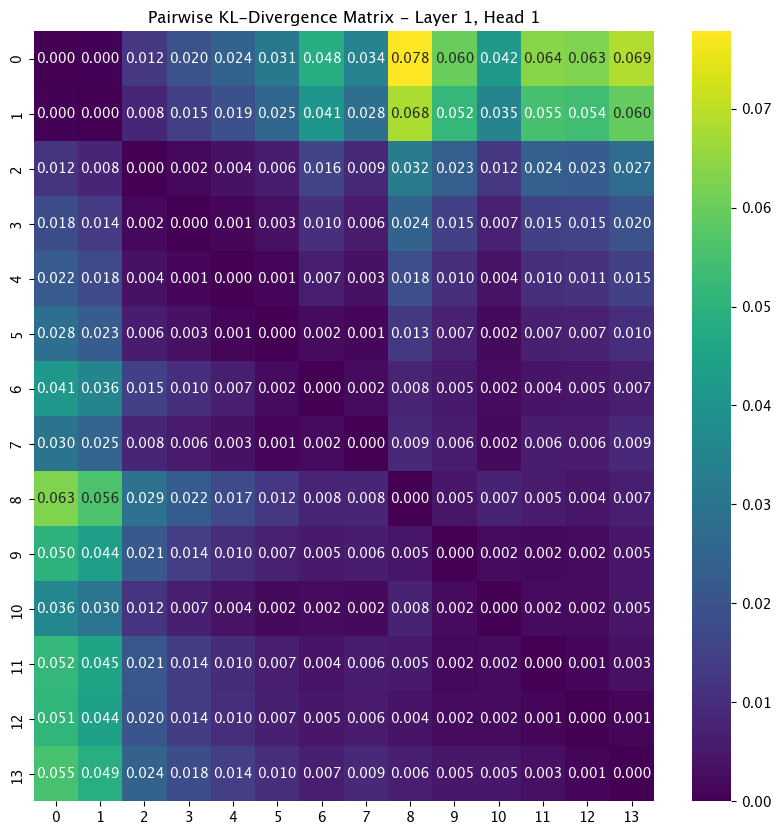

In [5]:
import torch
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model
import seaborn as sns
import matplotlib.pyplot as plt

def pairwise_kl_divergence_gpt2(layer: int, head: int):
    # Set up the GPT-2 model and tokenizer
    model_name = 'gpt2'
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2Model.from_pretrained(model_name, output_attentions=True)

    # Define the input text in English
    input_text = "Quantum Information Theory provides ways to study attention using entanglement."

    # Tokenize the input text and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(input_text)).unsqueeze(0)

    # Get the model output with attention weights
    outputs = model(input_ids)

    # Extract the attention weights for the given layer and head
    attention_weights = outputs.attentions[layer - 1][0, head - 1].detach().numpy()

    # Compute the probability distributions P(X_i) using softmax
    softmax_weights = np.apply_along_axis(lambda x: np.exp(x) / np.sum(np.exp(x)), -1, attention_weights)

    # Compute the pairwise KL-divergence matrix D_KL(P(X_i)||P(X_j))
    n = softmax_weights.shape[0]
    kl_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            p = softmax_weights[i, :]
            q = softmax_weights[j, :]
            kl_matrix[i, j] = np.sum(p * (np.log2(p + 1e-9) - np.log2(q + 1e-9)))

    return kl_matrix

def plot_heatmap(matrix, layer, head):
    plt.figure(figsize=(10, 10))
    sns.heatmap(matrix, annot=True, cmap="viridis", fmt=".3f")
    plt.title(f"Pairwise KL-Divergence Matrix - Layer {layer}, Head {head}")
    plt.show()

# Example usage:
layer = 1
head = 1
kl_matrix = pairwise_kl_divergence_gpt2(layer, head)
print("Matrix dimensions:", kl_matrix.shape)
plot_heatmap(kl_matrix, layer, head)


In [6]:
import torch
import numpy as np
from transformers import BertTokenizer, BertModel

def pairwise_kl_divergence(layer: int, head: int):
    # Set up the BERT model and tokenizer
    model_name = 'bert-base-multilingual-cased'
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name, output_attentions=True)

    # Define the input text in Yiddish (Hebrew script)
    input_text = "קוואַנטן אינפֿאָרמאַציע טעאָריע גיט וועגן צו פֿאָרשן אויפֿמערקזאַם מיט פֿאַרשלינגן"

    # Tokenize the input text and convert it to a tensor
    input_ids = torch.tensor(tokenizer.encode(input_text)).unsqueeze(0)

    # Get the model output with attention weights
    outputs = model(input_ids)

    # Extract the attention weights for the given layer and head
    attention_weights = outputs.attentions[layer - 1][0, head - 1].detach().numpy()

    # Compute the probability distributions P(X_i) using softmax
    softmax_weights = np.apply_along_axis(lambda x: np.exp(x) / np.sum(np.exp(x)), -1, attention_weights)

    # Compute the pairwise KL-divergence matrix D_KL(P(X_i)||P(X_j))
    n = softmax_weights.shape[0]
    kl_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            p = softmax_weights[i, :]
            q = softmax_weights[j, :]
            kl_matrix[i, j] = np.sum(p * (np.log2(p + 1e-9) - np.log2(q + 1e-9)))

    return kl_matrix

# Example usage:
layer = 1  # Choose the layer number
head = 1  # Choose the head number
kl_matrix = pairwise_kl_divergence(layer, head)
print("Matrix dimensions:", kl_matrix.shape)
print(kl_matrix)


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Matrix dimensions: (26, 26)
[[0.00000000e+00 1.93814188e-02 1.59871429e-02 1.90016963e-02
  1.74693651e-02 1.76621750e-02 1.67678259e-02 1.86269805e-02
  1.82236619e-02 1.91566199e-02 1.77613609e-02 1.68847665e-02
  1.78747103e-02 1.62866414e-02 1.63179450e-02 1.54489949e-02
  2.05162466e-02 1.76734440e-02 1.57894045e-02 1.56176277e-02
  1.81814060e-02 1.81294456e-02 1.82669237e-02 1.33567117e-02
  1.81077793e-02 4.55802865e-03]
 [1.59231015e-02 0.00000000e+00 4.18799696e-04 4.14589420e-03
  5.07596647e-04 5.78507665e-04 2.07082951e-03 3.80115467e-04
  7.45842815e-04 6.17072626e-04 4.72848816e-03 4.55368776e-04
  7.70850456e-04 1.06225861e-03 5.06444601e-04 4.49616462e-04
  4.79125185e-04 1.43440883e-03 1.00360112e-03 6.24053180e-04
  2.13531684e-03 2.10470706e-03 4.35097842e-04 1.50625966e-03
  2.08703405e-03 3.50543447e-02]
 [1.33889467e-02 4.18921933e-04 0.00000000e+00 3.14354314e-03
  3.56639619e-04 2.63666734e-04 1.19055342e-03 6.52957940e-04
  3.41225648e-04 3.80172627e-04 3.4701

If we want to do persistent homology, we may want a pairwise distance matrix between tokens, but the Kullback-Leibler (KL) divergence is not a genuine distance metric because it is not symmetric and does not satisfy the triangle inequality. To turn the KL-divergence into a genuine distance metric, one can use the Jensen-Shannon (JS) divergence, which is symmetric and satisfies the triangle inequality.

The Jensen-Shannon divergence is defined as the average of two KL divergences, using the average distribution of the two original distributions as a reference:

$$
JS(P, Q) = \frac{1}{2} D_{KL}(P || M) + \frac{1}{2} D_{KL}(Q || M)
$$

where $P$ and $Q$ are the original probability distributions, $D_{KL}$ is the KL divergence, and $M$ is the average distribution defined as:

$$
M = \frac{1}{2}(P + Q)
$$

However, the JS-divergence is still not a proper distance metric because it does not satisfy the triangle inequality. To obtain a genuine distance metric, one can take the square root of the JS-divergence. This is called the Jensen-Shannon distance:

$$
JS_{distance}(P, Q) = \sqrt{JS(P, Q)}
$$

The Jensen-Shannon distance is symmetric, non-negative, and satisfies the triangle inequality, making it a proper distance metric.

In [7]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from scipy.spatial.distance import jensenshannon
from ipywidgets import interact, widgets

def js_distance_matrix(layer: int, head: int, input_text1: str, input_text2: str):
    def get_distance_matrix(input_text):
        model_name = 'bert-base-uncased'
        tokenizer = BertTokenizer.from_pretrained(model_name)
        model = BertModel.from_pretrained(model_name, output_attentions=True)

        input_ids = torch.tensor(tokenizer.encode(input_text)).unsqueeze(0)
        outputs = model(input_ids)

        attention_weights = outputs.attentions[layer - 1][0, head - 1].detach().numpy()

        p_x = np.apply_along_axis(lambda x: np.exp(x) / np.sum(np.exp(x)), 1, attention_weights)

        num_tokens = p_x.shape[0]
        js_distance_mat = np.zeros((num_tokens, num_tokens))

        for i in range(num_tokens):
            for j in range(num_tokens):
                js_distance = jensenshannon(p_x[i], p_x[j])
                js_distance_mat[i, j] = js_distance

        return js_distance_mat

    js_distance_matrix_result1 = get_distance_matrix(input_text1)
    js_distance_matrix_result2 = get_distance_matrix(input_text2)

    return js_distance_matrix_result1, js_distance_matrix_result2


def interactive_js_distance_matrix(layer: int, head: int, input_text1: str, input_text2: str):
    js_distance_matrix_result1, js_distance_matrix_result2 = js_distance_matrix(layer, head, input_text1, input_text2)
    
    print("Matrix 1 dimensions:", js_distance_matrix_result1.shape)
    print(js_distance_matrix_result1)
    print("Matrix 2 dimensions:", js_distance_matrix_result2.shape)
    print(js_distance_matrix_result2)

interact(
    interactive_js_distance_matrix,
    layer=widgets.IntSlider(min=1, max=12, step=1, value=1),
    head=widgets.IntSlider(min=1, max=12, step=1, value=1),
    input_text1=widgets.Text(value='Example text 1', description='Text 1:'),
    input_text2=widgets.Text(value='Example text 2 is longer', description='Text 2:')
)

interactive(children=(IntSlider(value=1, description='layer', max=12, min=1), IntSlider(value=1, description='…

<function __main__.interactive_js_distance_matrix(layer: int, head: int, input_text1: str, input_text2: str)>

## Contextual Mappings and Attention

We will provide a code example using GPT-2 that illustrates the concept of "contextual mapping" as defined in the following text reference (see [Are Transformers universal approximators of sequence-to-sequence functions?
](https://arxiv.org/abs/1912.10077)). First, let us recall the definition: 

Let us consider a setting where we are interested in embedding two sentences: 1) I am happy; and 2) I am Bob. These sentences are fed to a sequence-to-sequence model as $X=[X_{:,1},X_{:,2},X_{:,3}] = [v_I,v_{am},v_{happy}]$ and $X'=[X'_{:,1},X'_{:,2},X'_{:,3}] = [v_I,v_{am},v_{Bob}]$, where $v_I,v_{am},v_{happy}$, and $v_{Bob}$ denote d-dimensional embedding for the tokens ‘I’, ‘am’, ‘happy’, and ‘Bob’, respectively. Since the word ‘I’ occurs in different contexts in these sentences, in order to implement arbitrary sequence-to-sequence functions, the sequence-to-sequence model should map the two occurrences of ‘I’ to **different values**. We formally define this requirement below. 

**Definition 3.1 (Contextual mapping)**. Consider a finite set $\mathbb{L} \subset \mathbb{R}^{d \times n}$. A map $q : \mathbb{L} \to \mathbb{R}^{1 \times n}$ defines a contextual mapping if the map satisfies the following: 

1. For any $L \in \mathbb{L}$, the $n$ entries in $q(L)$ are all distinct. 
2. For any $L, L' \in \mathbb{L}$,with $L \neq L'$, all entries of $q(L)$ and $q(L')$ are distinct. 

In other words, a contextual mapping maps each token (column) of $L \in \mathbb{L}$ to a unique value which depends on the entire $L$; as a result, capturing the precise context of $L$. This allows the subsequent token-wise function (e.g., defined by the feed-forward layers in case of Transformer networks) to realize the outputs of any arbitrary sequence-to-sequence functions.

While the self-attention layer does consider pair-wise interactions among different input tokens, it is not clear if this weak form of pair-wise interaction with shared projection weights is sufficient to extract the underlying context. The following result, which we sketch here, shows that self-attention layers can implement a **permutation equivariant contextual mapping** over almost all elements of a grid in $[0,1]^{d \times n}$. We defer the full statement to Section 4.2. 

**Lemma 6 (informal)**. Consider the grid $G_{\delta} := \{0,\delta ,...,1 − \delta\}^{d \times n}$. Then, there exist a function $g_c : \mathbb{R}^{d \times n} \to \mathbb{R}^{d \times n}$ composed of $\delta^{−d}+1$ self-attention layers ($h = 2, m = 1$) and a vector $u \in \mathbb{R}^d$ such that $q(L) := u^Tg_c(L)$ satisfies the following properties, for a subset $\tilde{G_{\delta}} \subset G_{\delta}$ that contains almost all elements of $G_{\delta}$: 

1. For any $L \in \tilde{G_{\delta}}$, the entries of $q(L)$ are all distinct. 
2. For any $L, L' \in \tilde{G_{\delta}}$ such that $L$ is not a permutation of $L'$, all entries of $q(L)$, $q(L')$ are distinct. 

Lemma 6 shows that a series of self-attention layers can implement contextual mappings, despite the apparent restriction that each of them can only capture pair-wise interaction. However, the restriction of permutation equivarance still exists because attention layers are inherently permutation equivariant. Coupled with the ability of token-wise feed-forward layers to map different values in $q(L)$ to arbitrary output values, we can prove universal approximation capability of Transformers.

This text is discussing the process of embedding sentences in the context of a sequence-to-sequence (seq2seq) model, which is a type of neural network used for various natural language processing tasks. The main idea is to represent the sentences using embeddings, which are numerical representations that capture the meaning of words or tokens. In this case, the sentences "I am happy" and "I am Bob" are being considered.

The sentences are represented as sequences of embeddings: X for the first sentence and ˜X for the second sentence. The individual tokens ('I', 'am', 'happy', and 'Bob') have corresponding d-dimensional embeddings ($v_I, v_{am}, v_{happy}$, and $v_{Bob}$).

The text then introduces the concept of contextual mapping. This is important because the word 'I' appears in both sentences, but its meaning or context is different in each case. To ensure the seq2seq model can handle these different contexts, it should map the two occurrences of 'I' to different values.

A contextual mapping (defined as q) is a function that maps a sequence of embeddings (L) to a unique value (R1×n), ensuring that the same token in different contexts gets different values. The definition 3.1 presents two conditions for a proper contextual mapping:

All entries in q(L) are distinct for any L, meaning that each token within a single sequence gets a unique value.
If $L$ and $L'$ are different sequences $(L \neq L')$, all entries of $q(L)$ and $q(L')$ are distinct, ensuring that the same token in different sequences gets different values.

By meeting these conditions, the contextual mapping function $q$ can capture the precise context of each token in a sequence. This is important because it enables the seq2seq model to understand and differentiate between the contextual meanings of words in different sentences.

The text also mentions that this contextual mapping can help subsequent token-wise functions, such as the feed-forward layers in Transformer networks, to realize the outputs of any arbitrary sequence-to-sequence functions. In other words, by ensuring that tokens in different contexts are properly distinguished, the seq2seq model can be more effective in tasks like machine translation, sentiment analysis, or text summarization, among others.

In summary, the text explains the concept of contextual mapping in the context of sequence-to-sequence models. This mapping function ensures that each token is assigned a unique value depending on its context within a sentence, which ultimately helps the model understand and process different meanings of the same word in various contexts. This is a crucial aspect of natural language processing, as it allows the model to capture and represent the nuances of human language more effectively.

In [8]:
import torch
from transformers import GPT2Tokenizer, GPT2Model, BertTokenizer, BertModel
import ipywidgets as widgets

# Define a function to compute context vectors based on the selected model
def compute_context_vectors(model_name, sentence1, sentence2, token_index1, token_index2):
    if model_name == "gpt2":
        tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
        model = GPT2Model.from_pretrained("gpt2")
    elif model_name == "bert":
        tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
        model = BertModel.from_pretrained("bert-base-uncased")

    input_ids1 = tokenizer.encode(sentence1, return_tensors="pt")
    input_ids2 = tokenizer.encode(sentence2, return_tensors="pt")

    with torch.no_grad():
        outputs1 = model(input_ids1)
        outputs2 = model(input_ids2)
        hidden_states1 = outputs1.last_hidden_state
        hidden_states2 = outputs2.last_hidden_state

    if token_index1 != token_index2:
        return "Tokens must be the same"
    else:
        context_vector1 = hidden_states1[0, token_index1, :]
        context_vector2 = hidden_states2[0, token_index2, :]

        cosine_similarity = torch.nn.functional.cosine_similarity(context_vector1.unsqueeze(0), context_vector2.unsqueeze(0))

        return cosine_similarity.item()

#Create two text boxes for entering sentences
sentence1_box = widgets.Text(
    value='The cat sat on the mat.',
    placeholder='Enter sentence 1',
    description='Sentence 1:',
    disabled=False
)

sentence2_box = widgets.Text(
    value='The cat chased the mouse.',
    placeholder='Enter sentence 2',
    description='Sentence 2:',
    disabled=False
)

# Choose the index of the token you want to compare
token_index_box1 = widgets.IntText(
    value=1,
    description='Token index 1:',
    disabled=False
)

token_index_box2 = widgets.IntText(
    value=1,
    description='Token index 2:',
    disabled=False
)

#Create a dropdown menu for model selection
model_dropdown = widgets.Dropdown(
    options=["gpt2", "bert"],
    value="gpt2",
    description="Model:",
    disabled=False,
)

#Define a function to handle model selection changes
def on_model_change(change):
    if change["type"] == "change" and change["name"] == "value":
        model_name = change["new"]
        cosine_similarity = compute_context_vectors(model_name, sentence1_box.value, sentence2_box.value, token_index_box1.value, token_index_box2.value)
        print(f"Cosine similarity for {model_name}: {cosine_similarity}")
    
#Add an event listener for the dropdown menu
model_dropdown.observe(on_model_change)

#Create a button to trigger the computation of cosine similarity
button = widgets.Button(description="Compute cosine similarity")

def on_button_click(b):
    cosine_similarity = compute_context_vectors(model_dropdown.value, sentence1_box.value, sentence2_box.value, token_index_box1.value, token_index_box2.value)
    print(f"Cosine similarity for {model_dropdown.value}: {cosine_similarity}")
    
button.on_click(on_button_click)

#Display the UI
display(sentence1_box)
display(sentence2_box)
display(token_index_box1)
display(token_index_box2)
display(model_dropdown)
display(button)

Text(value='The cat sat on the mat.', description='Sentence 1:', placeholder='Enter sentence 1')

Text(value='The cat chased the mouse.', description='Sentence 2:', placeholder='Enter sentence 2')

IntText(value=1, description='Token index 1:')

IntText(value=1, description='Token index 2:')

Dropdown(description='Model:', options=('gpt2', 'bert'), value='gpt2')

Button(description='Compute cosine similarity', style=ButtonStyle())

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Cosine similarity for bert: 0.8720437288284302
Cosine similarity for gpt2: 0.9999999403953552


## Contextual Mappings in Vision Transformers

In [9]:
import torch
from transformers import ViTModel, ViTConfig
from torchvision import transforms
from PIL import Image, ImageDraw
import ipywidgets as widgets
import numpy as np
import math 

def display_image_with_patches(image, patch_size, title):
    image_width, image_height = image.size
    draw = ImageDraw.Draw(image)
    patch_id = 0

    for y in range(0, image_height, patch_size):
        for x in range(0, image_width, patch_size):
            draw.rectangle([x, y, x + patch_size, y + patch_size], outline="red", width=2)
            draw.text((x + 5, y + 5), str(patch_id), fill="red")
            patch_id += 1

    image.show(title=title)

    
# Load a pre-trained Vision Transformer model
config = ViTConfig.from_pretrained("google/vit-base-patch16-224")
model = ViTModel.from_pretrained("google/vit-base-patch16-224")

# Prepare the image inputs
image_path_A = "heart.png"
image_path_B = "heart2.png"
image_A = Image.open(image_path_A).convert("RGB")
image_B = Image.open(image_path_B).convert("RGB")

num_patches_sqrt = int(math.sqrt(config.num_hidden_layers))
patch_size = 224 // num_patches_sqrt

# Display images with labeled patches
display_image_with_patches(image_A.copy(), patch_size, title="Image A with Patches")
display_image_with_patches(image_B.copy(), patch_size, title="Image B with Patches")


# Transform the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_input_A = transform(image_A).unsqueeze(0)  # Add batch dimension
image_input_B = transform(image_B).unsqueeze(0)  # Add batch dimension

# Pass the images through the model to get features
with torch.no_grad():
    outputs_A = model(image_input_A)
    outputs_B = model(image_input_B)
    hidden_states_A = outputs_A.last_hidden_state
    hidden_states_B = outputs_B.last_hidden_state

# Function to compute cosine similarity between image patches
def compute_cosine_similarity(patch_index_A, patch_index_B):
    patch_vector_A = hidden_states_A[0, patch_index_A, :]
    patch_vector_B = hidden_states_B[0, patch_index_B, :]
    
    cosine_similarity = torch.nn.functional.cosine_similarity(patch_vector_A.unsqueeze(0), patch_vector_B.unsqueeze(0))
    return cosine_similarity.item()

# Create input boxes for patch indices
patch_index_box_A = widgets.IntText(
    value=1,
    description='Patch index A:',
    disabled=False
)

patch_index_box_B = widgets.IntText(
    value=1,
    description='Patch index B:',
    disabled=False
)

# Create a button to trigger the computation of cosine similarity
button = widgets.Button(description="Compute cosine similarity")

def on_button_click(b):
    cosine_similarity = compute_cosine_similarity(patch_index_box_A.value, patch_index_box_B.value)
    print(f"Cosine similarity for patch indices {patch_index_box_A.value} and {patch_index_box_B.value}: {cosine_similarity}")

button.on_click(on_button_click)

# Display the UI
display(patch_index_box_A)
display(patch_index_box_B)
display(button)

Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


IntText(value=1, description='Patch index A:')

IntText(value=1, description='Patch index B:')

Button(description='Compute cosine similarity', style=ButtonStyle())

## Illustration of the Autoregressive Property of GPT-2

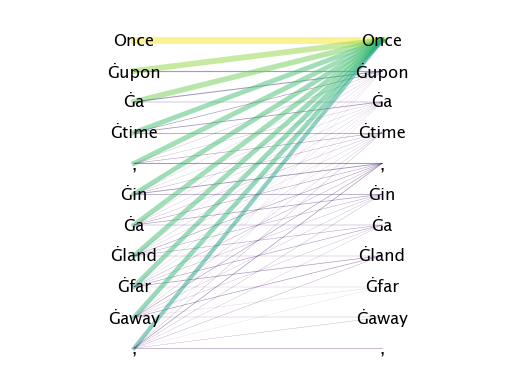

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model

def plot_attention(input_text):
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2Model.from_pretrained("gpt2", output_attentions=True)

    tokens = tokenizer.encode(input_text, return_tensors="pt")
    outputs = model(tokens)
    attentions = outputs.attentions

    # Get the attention weights of the last layer
    last_layer_attention = attentions[-1][0]
    avg_attention = last_layer_attention.mean(dim=0)

    fig, ax = plt.subplots()

    tokenized_text = tokenizer.convert_ids_to_tokens(tokens[0])

    for i, token1 in enumerate(tokenized_text):
        for j, token2 in enumerate(tokenized_text):
            weight = avg_attention[i, j].item()
            if weight > 0.01:  # Filter out very low weights for better visualization
                ax.plot([0, 1], [i, j], linewidth=weight * 5, alpha=0.5, color=plt.cm.viridis(weight))

    for i, token in enumerate(tokenized_text):
        ax.text(0, i, token, ha="center", va="center", rotation=0, size=12)
        ax.text(1, i, token, ha="center", va="center", rotation=0, size=12)

    ax.set_ylim(-1, len(tokenized_text))
    ax.set_xlim(-0.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Left Tokens", "Right Tokens"])
    ax.invert_yaxis()  # Invert y-axis to show tokens from top to bottom
    ax.axis("off")

    plt.show()


input_text = "Once upon a time, in a land far away,"
plot_attention(input_text)

Dropdown(description='Layer:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), value=0)

Dropdown(description='Head:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), value=0)

Button(description='Plot Attention', style=ButtonStyle())

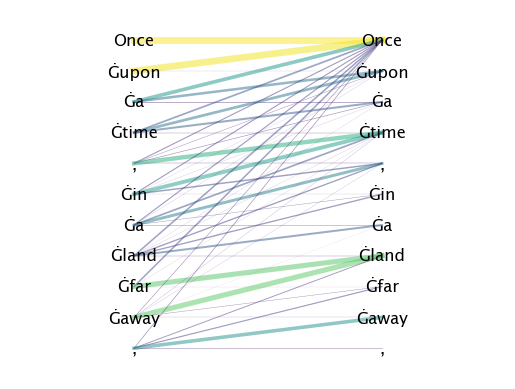

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model
import ipywidgets as widgets
from IPython.display import display

def plot_attention(input_text, layer, head):
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2Model.from_pretrained("gpt2", output_attentions=True)

    tokens = tokenizer.encode(input_text, return_tensors="pt")
    outputs = model(tokens)
    attentions = outputs.attentions

    # Get the attention weights of the selected layer and head
    selected_layer_attention = attentions[layer][0, head]

    fig, ax = plt.subplots()

    tokenized_text = tokenizer.convert_ids_to_tokens(tokens[0])

    for i, token1 in enumerate(tokenized_text):
        for j, token2 in enumerate(tokenized_text):
            weight = selected_layer_attention[i, j].item()
            if weight > 0.01:  # Filter out very low weights for better visualization
                ax.plot([0, 1], [i, j], linewidth=weight * 5, alpha=0.5, color=plt.cm.viridis(weight))

    for i, token in enumerate(tokenized_text):
        ax.text(0, i, token, ha="center", va="center", rotation=0, size=12)
        ax.text(1, i, token, ha="center", va="center", rotation=0, size=12)

    ax.set_ylim(-1, len(tokenized_text))
    ax.set_xlim(-0.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Left Tokens", "Right Tokens"])
    ax.invert_yaxis()  # Invert y-axis to show tokens from top to bottom
    ax.axis("off")

    plt.show()


input_text = "Once upon a time, in a land far away,"

# Create dropdown widgets for selecting layer and head
layer_dropdown = widgets.Dropdown(options=list(range(12)), description='Layer:')
head_dropdown = widgets.Dropdown(options=list(range(12)), description='Head:')

# Create button to plot attention
plot_button = widgets.Button(description='Plot Attention')

def on_plot_button_click(_):
    plot_attention(input_text, layer_dropdown.value, head_dropdown.value)

plot_button.on_click(on_plot_button_click)

# Display widgets
display(layer_dropdown)
display(head_dropdown)
display(plot_button)

Attention matrices can be used to illustrate the autoregressive property of GPT-2.

Autoregressive models like GPT-2 generate outputs one step at a time, where each step depends on the previous output steps. In GPT-2, this autoregressive property is achieved through a self-attention mechanism, where each token attends to all other tokens in the input sequence, with different weights assigned to each token based on their importance to the current output step.

The attention matrices in GPT-2 represent the weights assigned to each token in the input sequence for each output step. By looking at the attention matrices, we can see which tokens were given the most weight for a particular output step, which gives us an idea of how the autoregressive process is unfolding.

For example, in the early stages of generating text, we might expect to see the attention matrices weighted more heavily towards the beginning of the input sequence, as the model generates context and builds up the structure of the output text. As the output text progresses, the attention matrices might shift towards more recent tokens, reflecting the model's focus on maintaining coherence and relevance to the current output.

Overall, the attention matrices provide a useful tool for understanding the inner workings of GPT-2 and other autoregressive models, as they offer insight into how the model generates its output step by step.

The autoregressive nature of GPT-2 can be observed in the attention matrices by noticing how the attention patterns change as new tokens are generated. In an autoregressive model like GPT-2, each generated token depends on the previous tokens. This dependency can be seen in the attention matrices as non-uniform patterns, where certain tokens in the input sequence have higher attention weights than others.

When generating text one token at a time, the attention matrices show that GPT-2 focuses on different parts of the input sequence to decide the next token. As new tokens are generated, you can observe how the model shifts its attention to different parts of the input, including the most recently generated tokens. This illustrates the autoregressive nature of GPT-2, where it sequentially generates tokens based on the information from previous tokens.

In the attention heatmaps, you can observe this autoregressive behavior by looking at the last row of each matrix (corresponding to the latest generated token) and noticing how it attends to different tokens in the input sequence. The brighter spots in the heatmap indicate higher attention weights, revealing which tokens the model is focusing on at each step of the generation process.

Layer 1
Attention graph for step 1


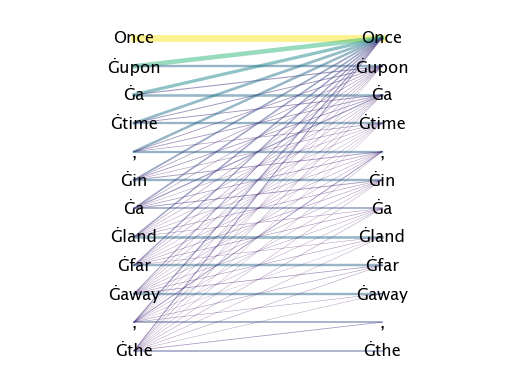

Attention graph for step 2


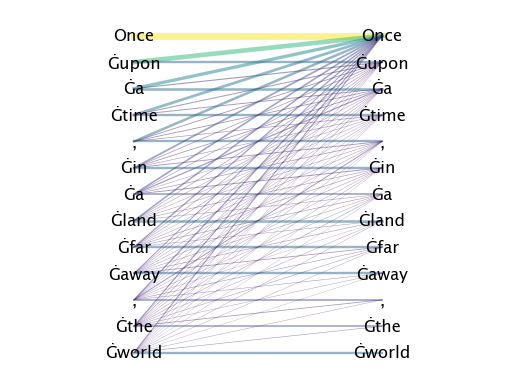

Attention graph for step 3


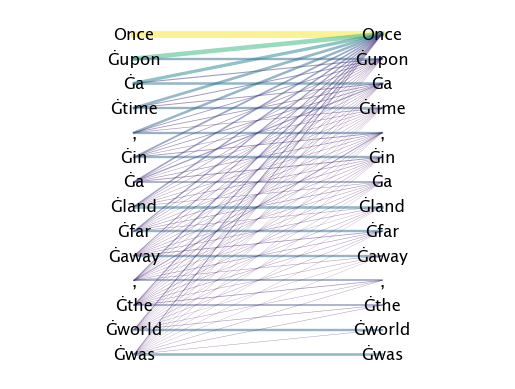

Attention graph for step 4


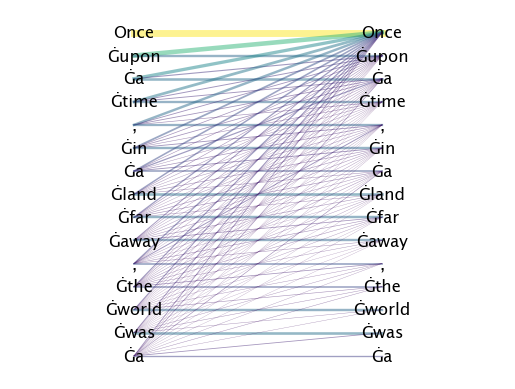

Attention graph for step 5


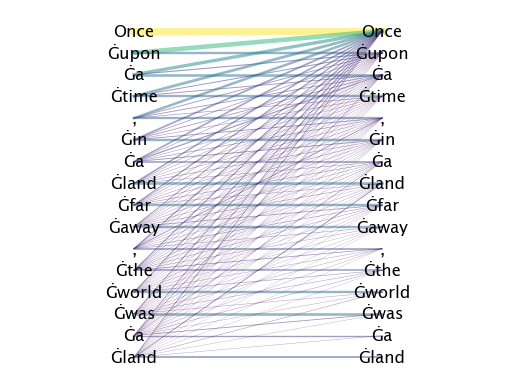

Attention graph for step 6


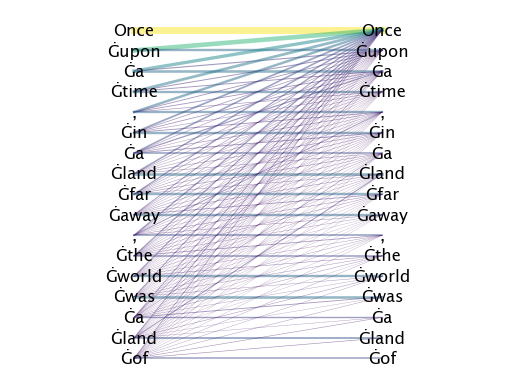

Attention graph for step 7


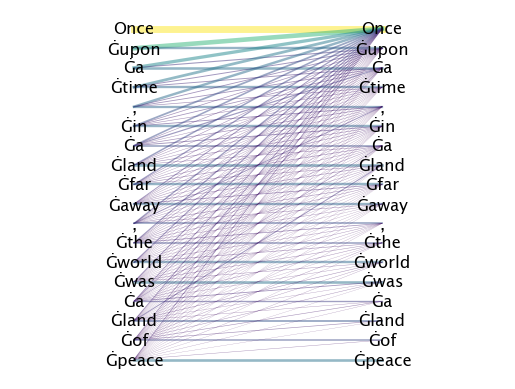

Attention graph for step 8


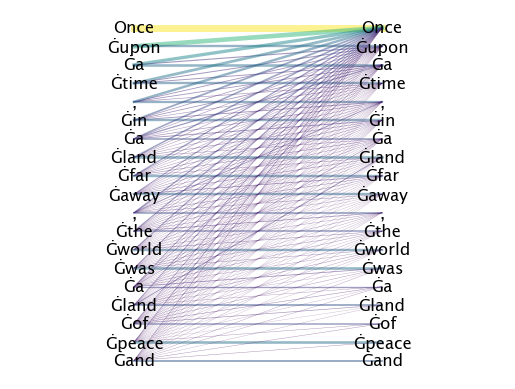

Attention graph for step 9


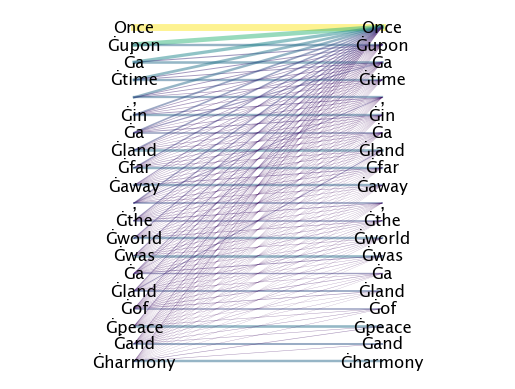

Attention graph for step 10


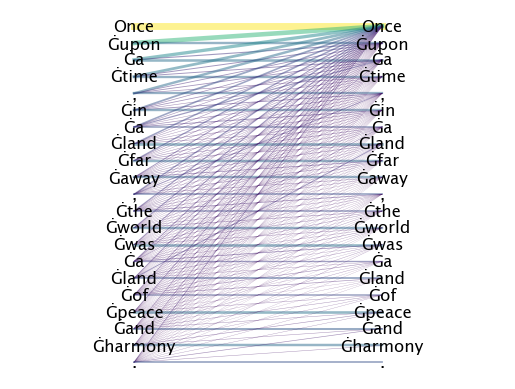

In [ ]:
import torch
import matplotlib.pyplot as plt
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import ipywidgets as widgets

# Load pre-trained GPT-2 model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Set model to evaluation mode
model.eval()

# Initial input text
input_text = "Once upon a time, in a land far away,"

# Tokenize the input text and convert to tensor
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Number of tokens to generate
num_tokens_to_generate = 10

# Dropdown menu for layers
layers = widgets.Dropdown(options=[(f"Layer {i+1}", i) for i in range(model.config.n_layer)], description="Layer:")

def plot_attention_graph(layer, input_ids):
    with torch.no_grad():
        outputs = model(input_ids, output_attentions=True)
        attentions = outputs.attentions

    last_layer_attention = attentions[layer][0]
    avg_attention = last_layer_attention.mean(dim=0)

    fig, ax = plt.subplots()

    tokenized_text = tokenizer.convert_ids_to_tokens(input_ids[0])

    for i, token1 in enumerate(tokenized_text):
        for j, token2 in enumerate(tokenized_text):
            weight = avg_attention[i, j].item()
            if weight > 0.01:
                ax.plot([0, 1], [i, j], linewidth=weight * 5, alpha=0.5, color=plt.cm.viridis(weight))

    for i, token in enumerate(tokenized_text):
        ax.text(0, i, token, ha="center", va="center", rotation=0, size=12)
        ax.text(1, i, token, ha="center", va="center", rotation=0, size=12)

    ax.set_ylim(-1, len(tokenized_text))
    ax.set_xlim(-0.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Left Tokens", "Right Tokens"])
    ax.invert_yaxis()
    ax.axis("off")

    plt.show()

def on_change(change):
    if change["name"] == "value":
        layer = layers.value
        current_input_ids = input_ids.clone()
        print(f"Layer {layer + 1}")
        for step in range(num_tokens_to_generate):
            with torch.no_grad():
                outputs = model(current_input_ids, output_attentions=True)
                logits = outputs.logits
                next_token = torch.argmax(logits[:, -1], dim=-1)
                current_input_ids = torch.cat((current_input_ids, next_token.unsqueeze(0)), dim=1)
                print(f"Attention graph for step {step + 1}")
                plot_attention_graph(layer, current_input_ids)

layers.observe(on_change)

# Display widgets
display(widgets.VBox([layers]))

Attention matrix heatmap for step 1
Attention matrix heatmap for step 2
Attention matrix heatmap for step 3
Attention matrix heatmap for step 4
Attention matrix heatmap for step 5
Attention matrix heatmap for step 6
Attention matrix heatmap for step 7
Attention matrix heatmap for step 8
Attention matrix heatmap for step 9
Attention matrix heatmap for step 10


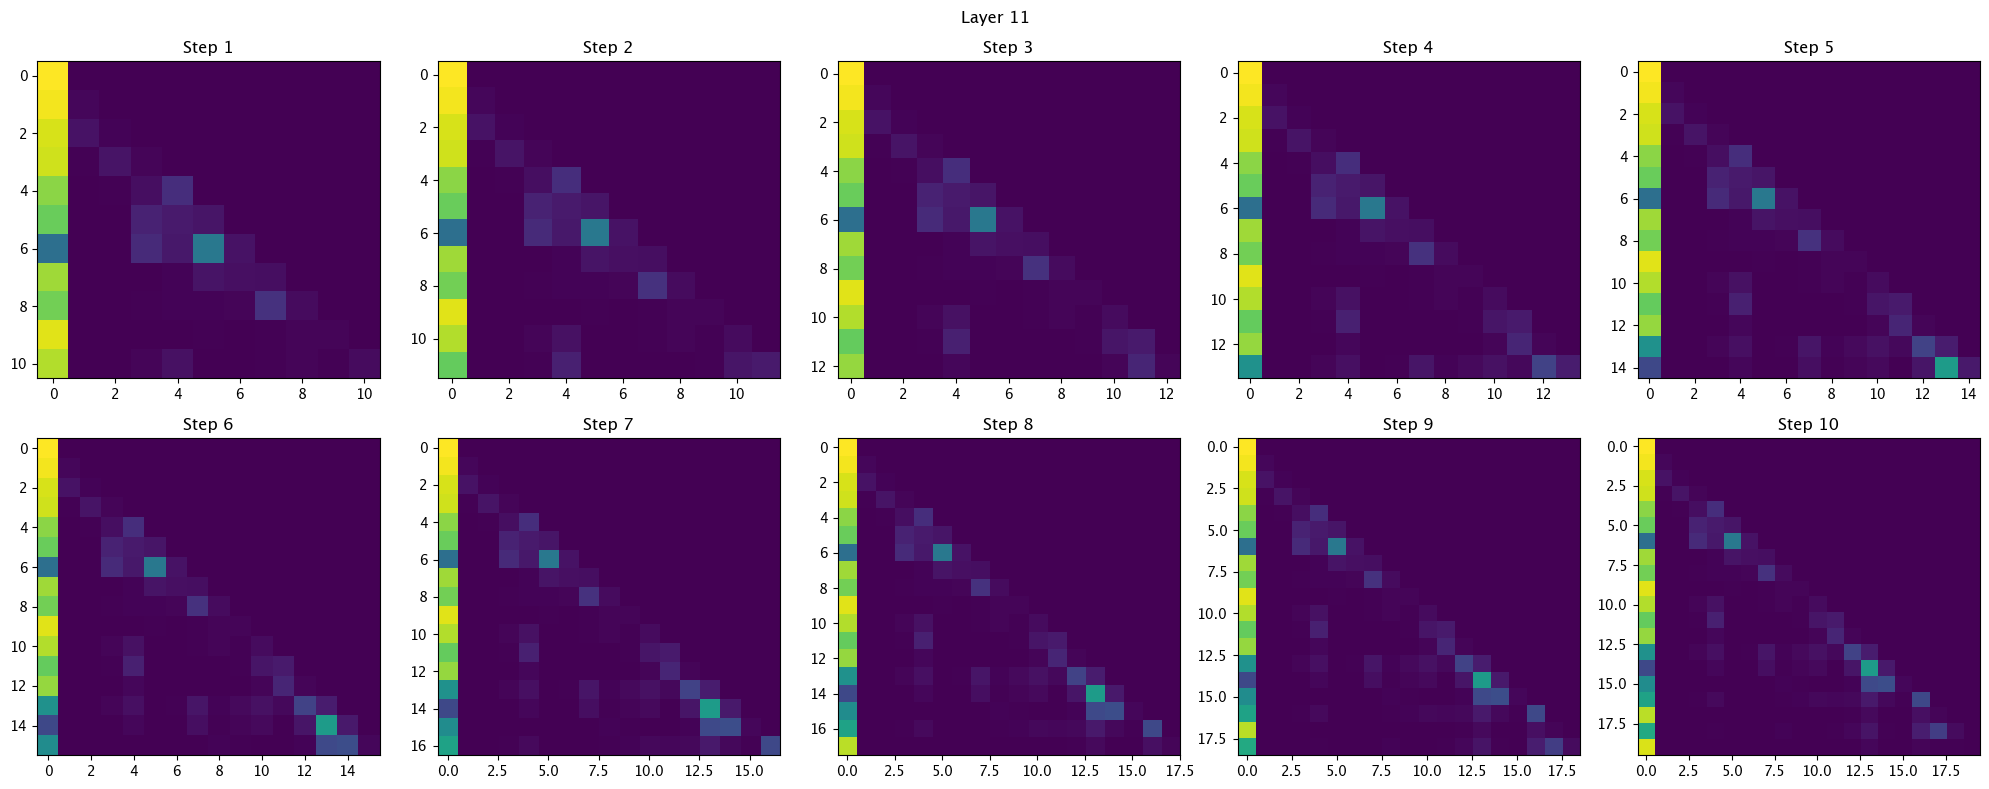

In [13]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load pre-trained GPT-2 model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Set model to evaluation mode
model.eval()

# Initial input text
input_text = "Once upon a time, in a land far away,"

# Tokenize the input text and convert to tensor
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Number of tokens to generate
num_tokens_to_generate = 10

# Dropdown menu for layers
layers = widgets.Dropdown(options=[(f"Layer {i+1}", i) for i in range(model.config.n_layer)], description="Layer:")

def plot_attention_matrices(layer):
    current_input_ids = input_ids.clone()
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Create a 2x5 grid of subplots
    fig.suptitle(f"Layer {layer + 1}")
    
    # Autoregressive text generation with attention matrix heatmap
    for step in range(num_tokens_to_generate):
        with torch.no_grad():
            # Get the logits and attention weights for the next token
            outputs = model(current_input_ids, output_attentions=True)
            logits = outputs.logits
            attentions = outputs.attentions

            # Sample the next token from the logits
            next_token = torch.argmax(logits[:, -1], dim=-1)

            # Add the new token to the input
            current_input_ids = torch.cat((current_input_ids, next_token.unsqueeze(0)), dim=1)

            # Plot the attention matrix heatmap for this step
            print(f"Attention matrix heatmap for step {step+1}")
            attention_matrices = attentions[layer].squeeze(0)[-1].cpu().numpy()
            ax = axes[step // 5, step % 5]  # Select the subplot
            ax.imshow(attention_matrices, cmap="viridis", aspect="auto")
            ax.set_title(f"Step {step + 1}")

    fig.tight_layout()
    plt.show()

# Interaction handling
def on_change(change):
    if change["name"] == "value":
        layer = layers.value
        plot_attention_matrices(layer)

layers.observe(on_change)

# Display widgets
display(widgets.VBox([layers]))